#### **Import libs and data**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import geopandas as gpd
import seaborn as sns

In [93]:
data = pd.read_csv('D:\\Education\\IITM\\2 Trimester\\AI Lab\\Assignment 1\\Assignment 1\\Outbreak_India.csv', index_col=0)
data.head()


,Name of \n State/UT,Name of \n District,Disease/ Illness,No. of Cases,No. of Deaths,Date of \n start of \n outbreak,Date Reported,Current Status,Comments
Serial no,,,,,,,,,
1.0,Karnataka,? Shimoga,Typhoid Fever,38,0,10-05-14,Reported late,Under \n Control,Cases of fever reported from Surya Nursing Col...
2.0,Jammu & \n Kashmir,09 Districts,Dengue,66,0,02-09-15,Reported late,Under Surveillance,Cases of fever with headache and body ache wer...
3.0,Jharkhand,10 Districts,Japanease Encephalitis,180,2,18-04-15,Reported late,Under surveillance,"Cases of fever reported from Ranchi,East, Sing..."
4.0,Jharkhand,20 Districts,Dengue,169,0,21-07-15,Reported late,Under surveillance,Cases of fever with joint pain reported from R...
5.0,West Bengal,24 South Paragnas,Food Poisoning,65,0,30-04-18,01-05-18,Under Surveillanc e,Cases of vomiting with loose stools reported a...


#### **Methods for cleaning and processing data**
##### Removal of spaces

In [94]:
def removeWhitespaces( s ):
    return " ".join(s.split())

def remove_symbols(s):
    return re.sub(r'[^A-Za-z0-9]', '_', '-', s.replace('?', ''))

def addCasesOnData ( date ):
    cleanData[cleanData["Date of \n start of \n outbreak"] == date]['No. of Cases'].sum()

#### **Data preprocessing**

In [95]:
# Identifying how many NA values are present in the columns
data.isna().sum().sort_values()

Name of \n State/UT                 1
Disease/ Illness                    1
No. of Deaths                       1
Date of \n start of \n outbreak     1
Date Reported                       1
Name of \n District                 2
No. of Cases                        4
Current Status                      4
Comments                           10
dtype: int64

**We observe that the number of rows with NaN values are not many. So it is safe to remove these instead of imputing.**

In [96]:
data = data.dropna(axis=0)

**States**

In [97]:
data [ 'Name of \n State/UT' ].unique()

array(['Karnataka', 'Jammu & \n Kashmir', 'Jharkhand', 'West Bengal',
       'Tripura', 'Gujarat', 'Andhra Pradesh', 'Telangana',
       'Uttar \n Pradesh', 'Madhya \n Pradesh', 'Maharashtra', 'Mizoram',
       'Rajasthan', 'Kerala', 'Bihar', 'Uttarakhand', 'Haryana', 'Punjab',
       'Andaman & \n Nicobar \n Islands', 'Orissa', 'Arunachal Pradesh',
       'Tamil Nadu', 'Assam', 'Chhattisgarh', 'Himachal \n Pradesh',
       'Manipur', 'Delhi', 'Chandigarh', 'Dadar & \n Nagar Haveli',
       'Daman & \n Diu', 'Nagaland', 'Meghalaya', 'Sikkim', 'Goa',
       'Puducherry', 'Lakshadweep', 'Name of \n State/UT', 'M\n anipur'],
      dtype=object)

In [98]:
data [ 'Name of \n State/UT' ] = data['Name of \n State/UT'].apply ( removeWhitespaces )
data [ 'Name of \n State/UT' ].unique()

array(['Karnataka', 'Jammu & Kashmir', 'Jharkhand', 'West Bengal',
       'Tripura', 'Gujarat', 'Andhra Pradesh', 'Telangana',
       'Uttar Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Rajasthan', 'Kerala', 'Bihar', 'Uttarakhand', 'Haryana', 'Punjab',
       'Andaman & Nicobar Islands', 'Orissa', 'Arunachal Pradesh',
       'Tamil Nadu', 'Assam', 'Chhattisgarh', 'Himachal Pradesh',
       'Manipur', 'Delhi', 'Chandigarh', 'Dadar & Nagar Haveli',
       'Daman & Diu', 'Nagaland', 'Meghalaya', 'Sikkim', 'Goa',
       'Puducherry', 'Lakshadweep', 'Name of State/UT', 'M anipur'],
      dtype=object)

In [99]:
# Manual removal of whitespace using domain knowledge
data [ 'Name of \n State/UT' ] = data['Name of \n State/UT'].replace ( "M anipur", "Manipur" )
data [ 'Name of \n State/UT' ].unique()

array(['Karnataka', 'Jammu & Kashmir', 'Jharkhand', 'West Bengal',
       'Tripura', 'Gujarat', 'Andhra Pradesh', 'Telangana',
       'Uttar Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Rajasthan', 'Kerala', 'Bihar', 'Uttarakhand', 'Haryana', 'Punjab',
       'Andaman & Nicobar Islands', 'Orissa', 'Arunachal Pradesh',
       'Tamil Nadu', 'Assam', 'Chhattisgarh', 'Himachal Pradesh',
       'Manipur', 'Delhi', 'Chandigarh', 'Dadar & Nagar Haveli',
       'Daman & Diu', 'Nagaland', 'Meghalaya', 'Sikkim', 'Goa',
       'Puducherry', 'Lakshadweep', 'Name of State/UT'], dtype=object)

**Diseases**

In [100]:
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].apply ( removeWhitespaces )

In [101]:
# Manual removal of erroneous disease names using domain knowledge
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Chikunguny a", "Chikungunya" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Leptospiro sis", "Leptospirosis" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Viral Encephalitis (Chandipura)", "Chandipura Viral Encephalitis" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Typhoid Fever", "Typhoid" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Acute Encephaliti s Syndrome", "Acute Encephalitis Syndrome" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Pertusis", "Pertussis" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "F ood Poisoning", "Food Poisoning" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Rubell a & Measles", "Rubella & Measles" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Food (Alcohol) poisoning", "Alcohol poisoning" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Provisional Chickenpox", "Provisional Chickenpox Measles" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Seasonal Influenza A(H1N1)", "H1N1" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Influenza A H1N1", "H1N1" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Rubell a", "Rubella" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Rubell a & Measles", "Rubella & Measles" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Disease", "Name of Disease" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Poisoning", "Food Poisoning" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Staphylococcal Food Poisoning", "Food Poisoning" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Trichenellosis", "Trichinellosis" )
data [ 'Disease/ Illness' ] = data['Disease/ Illness'].replace ( "Trichinell a", "Trichinellosis" )

data = data[data['Disease/ Illness']!="Name of Disease"]
data = data[data['Disease/ Illness']!="South 24 Parganas"]
data = data[data['Disease/ Illness']!="South Goa"]
data = data[data['Disease/ Illness']!="South West"]

**No. of Cases**

In [102]:
# clean No. of Cases
data['No. of Cases'] = data['No. of Cases'].str.extract('(\d+)', expand=False)
data = data.dropna(axis=0)
data['No. of Cases'] = data['No. of Cases'].astype('int64')

In [103]:
# clean No. of Deaths
data['No. of Deaths'] = data['No. of Deaths'].str.extract('(\d+)', expand=False)
data = data.dropna(axis=0)
data['No. of Deaths'] = data['No. of Deaths'].astype('int64')

In [104]:
# Remove outlier 
data = data [data ['No. of Cases'] < 30000]

**Disctricts**

**Here we will only clean data for Assigned State's disctricts - Gujarat**

In [105]:
stateData = data [ data["Name of \n State/UT"] == "Gujarat"].copy()
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].apply ( removeWhitespaces )
stateData ['Name of \n District'].unique()

array(['A nand', 'Ahemdabad', 'Ahmadabad', 'Ahmedabad', 'All districts',
       'Amreli', 'Anand', 'Aravalli', 'Arvalli', 'Banaskanth a',
       'Banaskantha', 'Bharuch', 'Bhavnagar', 'Bhavnagar MC', 'Botad',
       'Botal', 'Chhota Udepur', 'Chota Udaipur', 'Dahod', 'Dangs',
       'Dev Bhumi Dwarka', 'Dev BhumiDwar ka', 'Devbhoomi Dwarka',
       'Gandhi Nagar', 'Gandhinaga r', 'Gandhinagar', 'Ghandhinagar',
       'Gir Somnath', 'GirSomnath', 'Jamnagar', 'Junagadh', 'Junagarh',
       'Kheda', 'Kutch', 'Lakhimpur Kheri', 'Mahesana', 'Mahisagar',
       'Mandsaur', 'Mehasana', 'Mehsana', 'Morbi', 'Narmada', 'Navasari',
       'Navsari', 'Panchamahal', 'Panchmahal', 'Patan', 'Porbandar',
       'Porbander', 'Rajkot', 'Rajkot and several districts',
       'Sabakrantha', 'Sabarkantha', 'Surat', 'Surendernagar',
       'Surendranag ar', 'Surendranaga r', 'Surendranagar', 'Tapi',
       'Tapi (Surat)', 'Vadodara', 'Valsad'], dtype=object)

In [106]:
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "A nand", "Anand" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Ahemdabad", "Ahmedabad" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Ahmadabad", "Ahmedabad" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Arvalli", "Aravalli" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Banaskanth a", "Banaskantha" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Botal", "Botad" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Bhavnagar MC", "Bhavnagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Chota Udaipur", "Chhota Udepur" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Dev Bhumi Dwarka", "Devbhumi Dwarka" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Dev BhumiDwar ka", "Devbhumi Dwarka" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Devbhoomi Dwarka", "Devbhumi Dwarka" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Gandhi Nagar", "Gandhinagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Gandhinaga r", "Gandhinagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Ghandhinagar", "Gandhinagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Gir Somnath", "Gir Somnath" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "GirSomnath", "Gir Somnath" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Junagarh", "Junagadh" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Mahesana", "Mehsana" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Mehesana", "Mehsana" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Mehasana", "Mehsana" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Navasari", "Navsari" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Panchamahal", "Panchmahal" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Porbander", "Porbandar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Rajkot and several districts", "Rajkot" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Sabakrantha", "Sabarkantha" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Surendernagar", "Surendranagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Surendranag ar", "Surendranagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Surendranaga r", "Surendranagar" )
stateData [ 'Name of \n District' ] = stateData['Name of \n District'].replace ( "Tapi (Surat)", "Tapi" )

In [107]:
stateData ['Name of \n District'].unique()

array(['Anand', 'Ahmedabad', 'All districts', 'Amreli', 'Aravalli',
       'Banaskantha', 'Bharuch', 'Bhavnagar', 'Botad', 'Chhota Udepur',
       'Dahod', 'Dangs', 'Devbhumi Dwarka', 'Gandhinagar', 'Gir Somnath',
       'Jamnagar', 'Junagadh', 'Kheda', 'Kutch', 'Lakhimpur Kheri',
       'Mehsana', 'Mahisagar', 'Mandsaur', 'Morbi', 'Narmada', 'Navsari',
       'Panchmahal', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Tapi', 'Vadodara', 'Valsad'],
      dtype=object)

**Storing clean data in a new dataframe**

In [108]:
cleanData = data.copy()

#### **Q2. a) Scatter plot and pie charts.**


**We build a scatter plot for number of cases vs number of deaths**

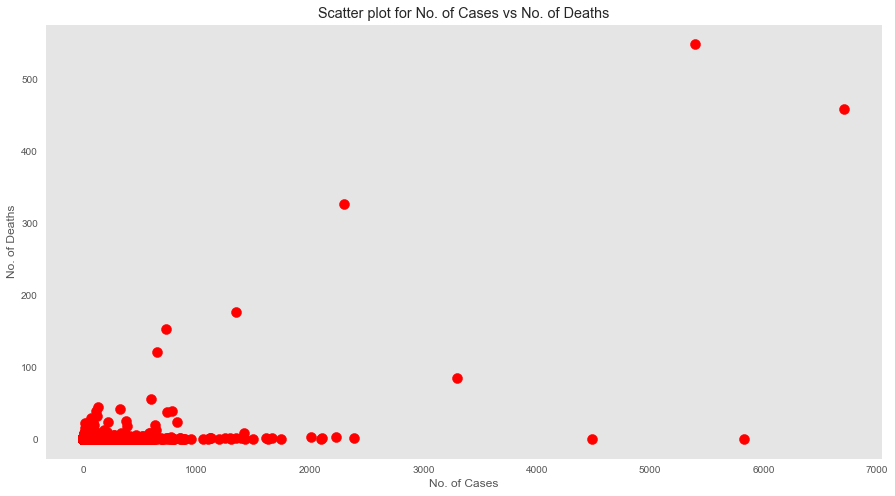

In [110]:
cases = cleanData['No. of Cases']
deaths = cleanData['No. of Deaths']
f = plt.figure(figsize=(15,8))
plt.xlabel ('No. of Cases')
plt.ylabel ('No. of Deaths')
plt.title ("Scatter plot for No. of Cases vs No. of Deaths" )
plt.grid()
plt.scatter(cases, deaths, s =100, c = 'red')

**Assigned state - Gujarat**

**Assigned disease - Food poisoning**

**For pie chart, we have several options. Firstly we can analyze the number of cases vs states for all the data**

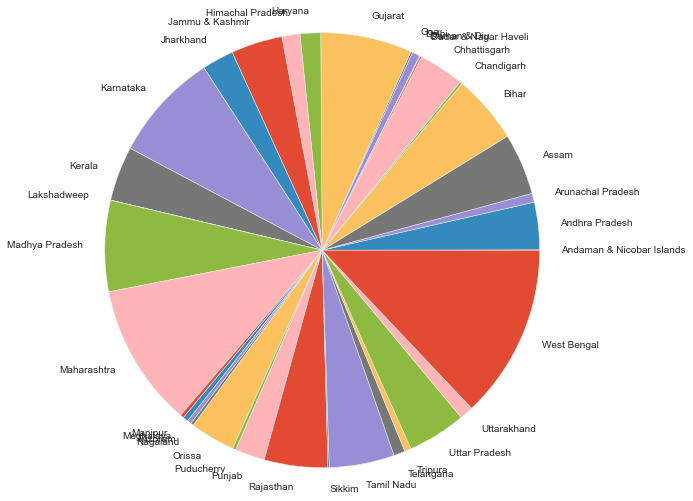

In [111]:
stateVScases = cleanData.groupby('Name of \n State/UT')['No. of Cases'].sum()
stateVScases = stateVScases.reset_index()
y = np.array(stateVScases ['No. of Cases'])
states = np.array (stateVScases ['Name of \n State/UT'])
plt.pie(y, labels = states, radius=2.5)
plt.show() 

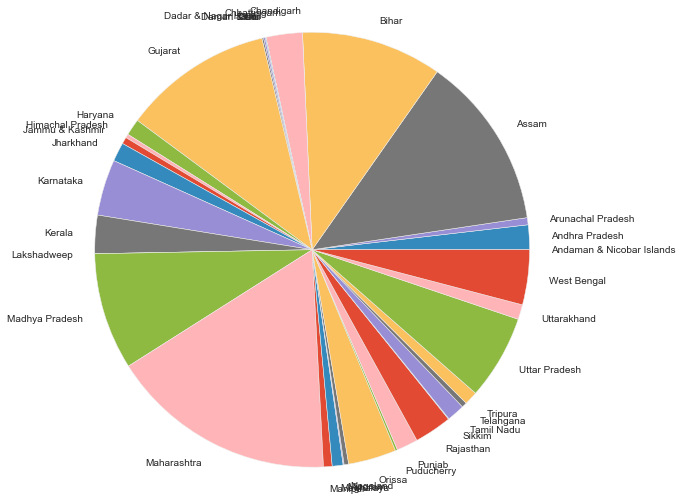

In [112]:
stateVSdeaths = cleanData.groupby('Name of \n State/UT')['No. of Deaths'].sum()
stateVSdeaths = stateVSdeaths.reset_index()
y = np.array(stateVSdeaths ['No. of Deaths'])
states = np.array (stateVSdeaths ['Name of \n State/UT'])
plt.pie(y, labels = states, radius=2.5)
plt.show() 

#### **Q2. b) Word clouds of different outbreaks in different districts**

**Following wordcloud dipicts the frequency of all diseases all over Gujarat**

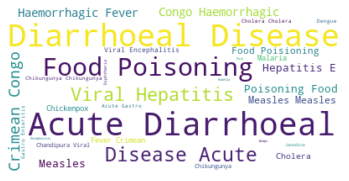

In [113]:
text = stateData['Disease/ Illness'].values
text = ','.join(text)

# Create and generate a word cloud image:
wc = WordCloud(background_color="white")
wc.generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**We shall now show wordclouds district wise, which shall portray the disease common in a certain distrcit**

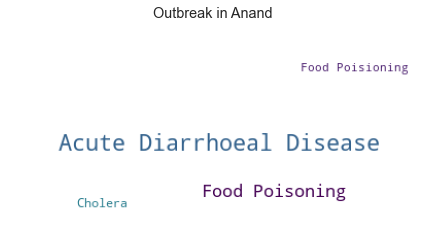

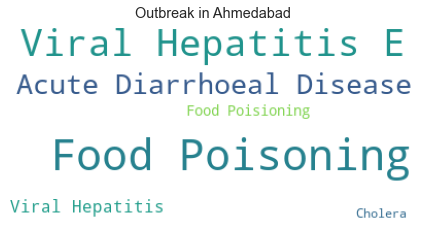

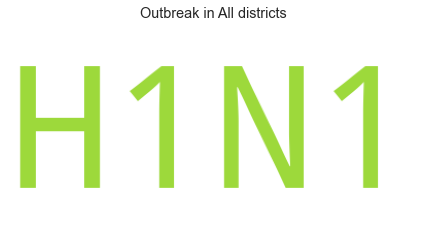

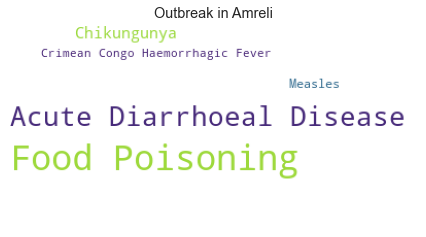

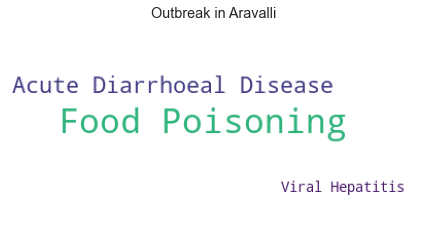

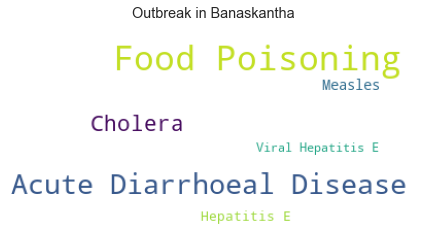

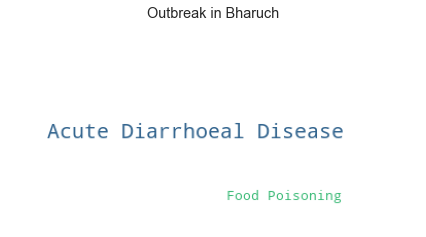

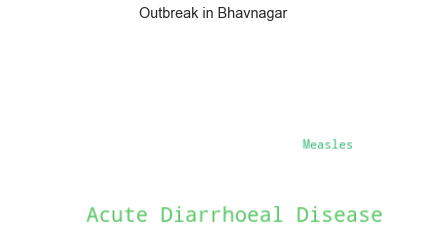

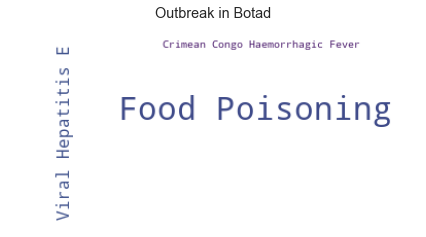

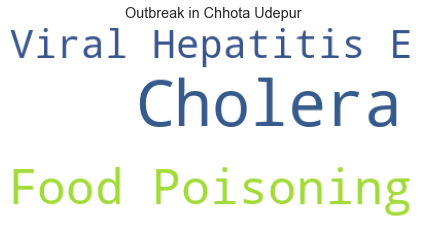

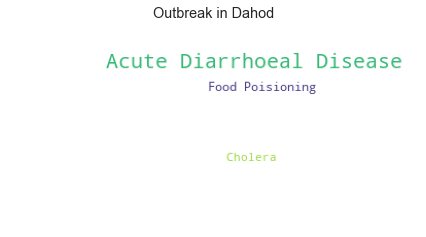

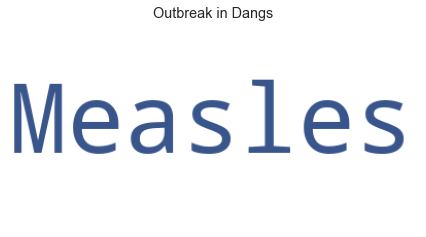

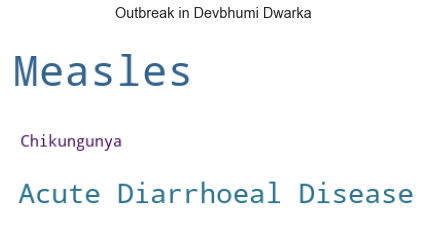

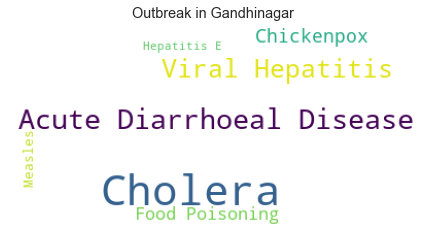

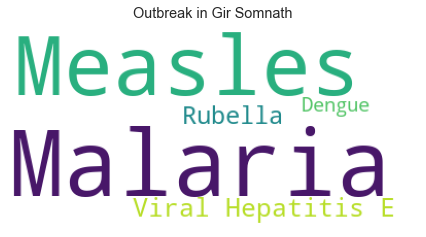

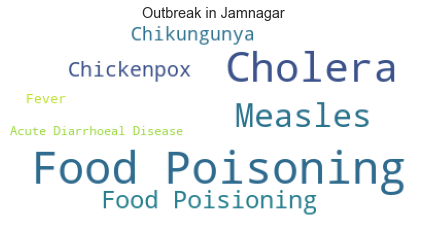

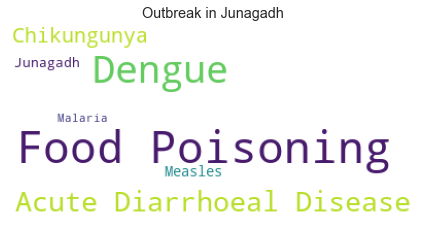

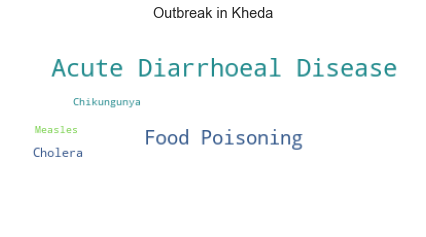

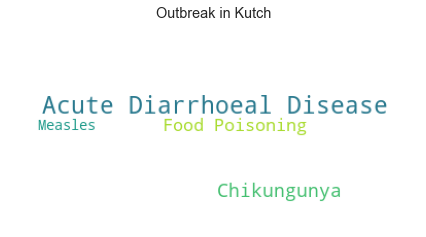

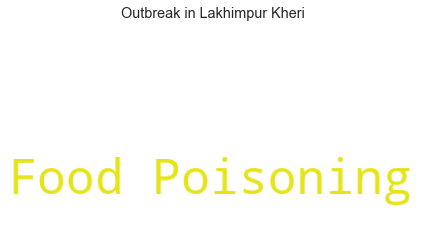

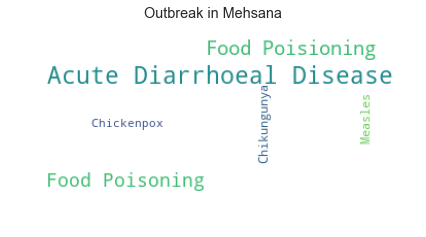

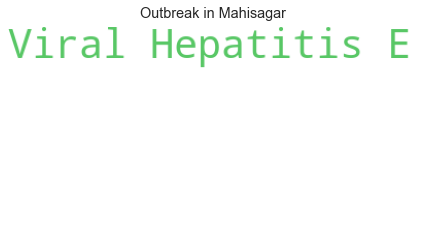

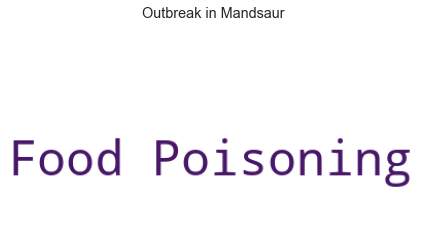

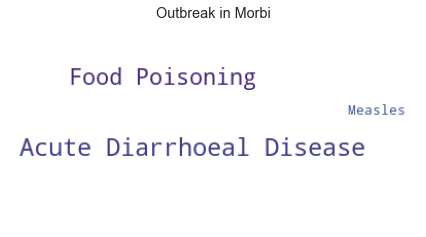

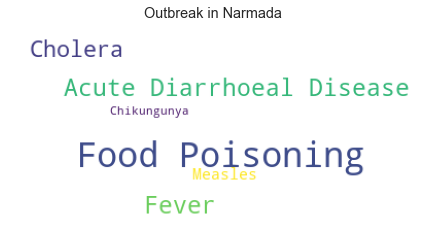

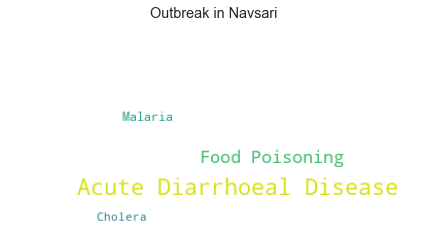

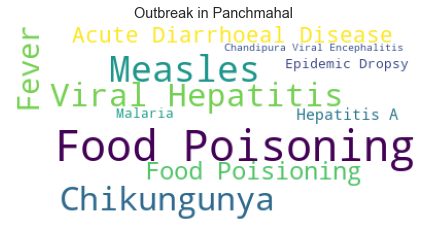

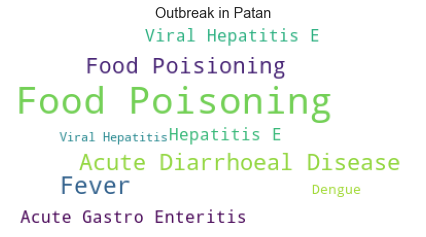

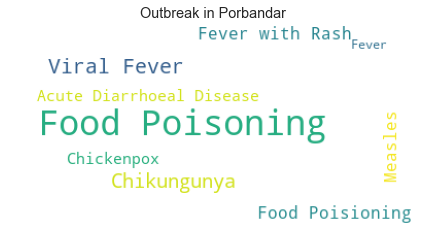

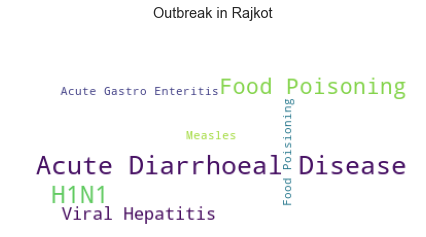

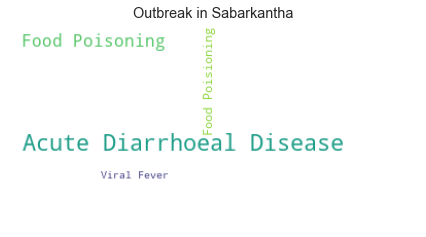

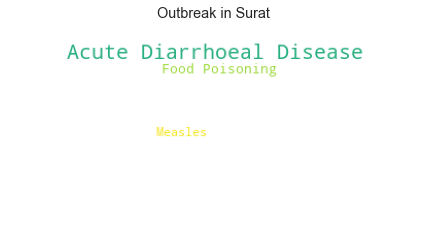

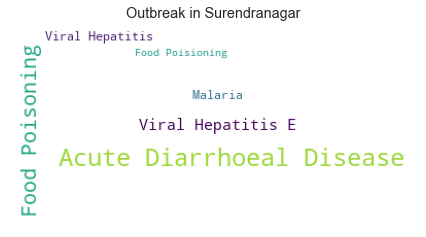

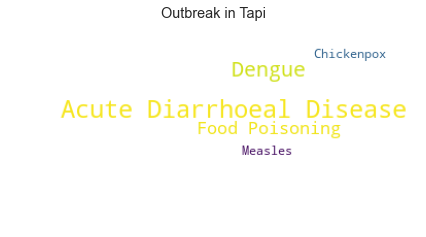

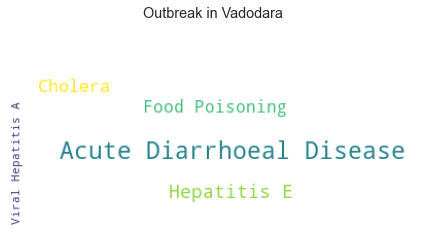

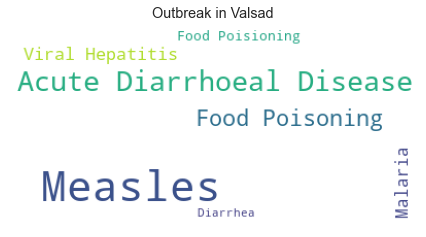

In [114]:
for x in stateData['Name of \n District'].unique():
    district_df = stateData[stateData['Name of \n District']==x]
    district_Outbreak_data_sorted = district_df.groupby(['Disease/ Illness']).sum().sort_values(by='No. of Cases',ascending=False)
    
    dic = {}
    for a in range(len(district_Outbreak_data_sorted.values)):
        dic[district_Outbreak_data_sorted.index[a]] = district_Outbreak_data_sorted.values[a][0]


    wordcloud = WordCloud( background_color ='white',
                    min_font_size = 10).generate_from_frequencies(dic)
    #plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 1)
    plt.title('Outbreak in ' + x)
    plt.show()

#### **Q2. c) Geo-spatial plots for top 10 outbreaks in the assigned ”state”, i.e. Gujarat**

**First, we will find the top ten outbreaks in the state**

In [115]:
counts = stateData.groupby('Disease/ Illness')['No. of Cases'].sum()
counts = counts.reset_index()
topTenDiseases = counts.sort_values(by=['No. of Cases'], ascending=False).head(10)
print(topTenDiseases)

            Disease/ Illness  No. of Cases
0   Acute Diarrhoeal Disease         15336
21            Food Poisoning         11525
22                      H1N1          7362
10                   Cholera          3024
29                   Measles          2622
20           Food Poisioning          1920
39           Viral Hepatitis          1811
41         Viral Hepatitis E          1791
9                Chikungunya          1065
28                   Malaria           870


In [116]:
sns.set_style('whitegrid')

fp = 'D:\\Education\\IITM\\2 Trimester\\AI Lab\\Assignment 1\\maps-master\\maps-master\\Districts\\Census_2011\\2011_Dist.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df_state = map_df[map_df['ST_NM']=="Gujarat"]

**Since the district spelling name is different in downloaded geoplot dataset and out dataset, we will do some cleaning up**

In [117]:
print(map_df_state['DISTRICT'].unique())
print(stateData['Name of \n District'].unique())

['Ahmadabad' 'Amreli' 'Anand' 'Banas Kantha' 'Bharuch' 'Bhavnagar' 'Dohad'
 'Gandhinagar' 'Jamnagar' 'Junagadh' 'Kachchh' 'Kheda' 'Mahesana'
 'Narmada' 'Navsari' 'Panch Mahals' 'Patan' 'Porbandar' 'Rajkot'
 'Sabar Kantha' 'Surat' 'Surendranagar' 'The Dangs' 'Vadodara' 'Valsad'
 'Tapi']
['Anand' 'Ahmedabad' 'All districts' 'Amreli' 'Aravalli' 'Banaskantha'
 'Bharuch' 'Bhavnagar' 'Botad' 'Chhota Udepur' 'Dahod' 'Dangs'
 'Devbhumi Dwarka' 'Gandhinagar' 'Gir Somnath' 'Jamnagar' 'Junagadh'
 'Kheda' 'Kutch' 'Lakhimpur Kheri' 'Mehsana' 'Mahisagar' 'Mandsaur'
 'Morbi' 'Narmada' 'Navsari' 'Panchmahal' 'Patan' 'Porbandar' 'Rajkot'
 'Sabarkantha' 'Surat' 'Surendranagar' 'Tapi' 'Vadodara' 'Valsad']


In [118]:
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Ahmadabad", "Ahmedabad" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Kachchh", "Kutch" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Mahesana", "Mehsana" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Panch Mahals", "Panchmahal" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Sabar Kantha", "Sabarkantha" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "The Dangs", "Dangs" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Ahmadabad", "Ahmedabad" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Dohad", "Dahod" )
map_df_state [ 'DISTRICT' ] = map_df_state['DISTRICT'].replace ( "Banas Kantha", "Banaskantha" )

In [119]:
casesPerDistrict = stateData.groupby('Name of \n District')['No. of Cases'].sum()
casesPerDistrict = casesPerDistrict.reset_index()

casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="All districts"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Aravalli"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Botad"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Chhota Udepur"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Devbhumi Dwarka"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Gir Somnath"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Lakhimpur Kheri"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Mahisagar"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Mandsaur"]
casesPerDistrict = casesPerDistrict[casesPerDistrict['Name of \n District']!="Morbi"]

In [120]:
merged = map_df_state.set_index('DISTRICT').join(casesPerDistrict.set_index('Name of \n District'))
#merged = merged.drop(['No. of Deaths','No. of Deaths','Date Reported','Current Status','Comments','Date of \n start of \n outbreak'], axis=1)
#merged = merged.replace(np.nan, 0)
merged['No. of Cases'] = merged['No. of Cases'].astype('int64')
merged.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,No. of Cases
DISTRICT,,,,,,
Ahmedabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",2711
Amreli,Gujarat,24,13,480,"MULTIPOLYGON (((71.34976 21.98236, 71.36728 21...",1141
Anand,Gujarat,24,15,482,"MULTIPOLYGON (((73.05631 22.72778, 73.05730 22...",2236
Banaskantha,Gujarat,24,2,469,"POLYGON ((72.26847 24.62413, 72.26909 24.62423...",3650
Bharuch,Gujarat,24,21,488,"MULTIPOLYGON (((72.65792 21.47014, 72.65792 21...",842


<AxesSubplot:title={'center':'Top 10 diseases'}>

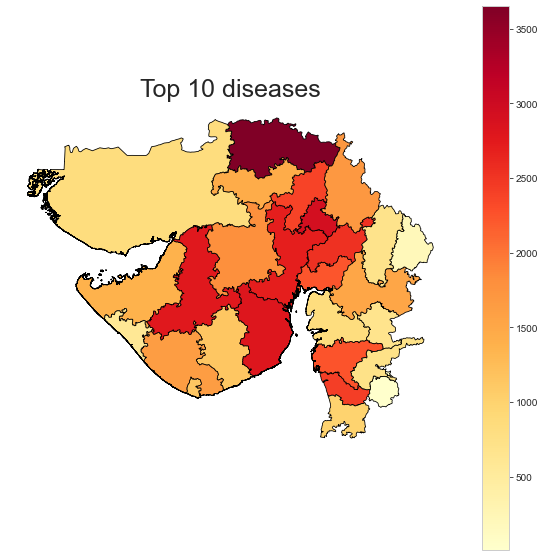

In [121]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Top 10 diseases', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='No. of Cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

#### **Q2. d) For the assigned ”outbreak”, the geospatial plot for different states**
**Assigned Outbreak is Food Poisoning**

In [122]:
foodPoisoningData = cleanData[cleanData['Disease/ Illness']=="Food Poisoning"]
foodPoisoningData.head()

,Name of \n State/UT,Name of \n District,Disease/ Illness,No. of Cases,No. of Deaths,Date of \n start of \n outbreak,Date Reported,Current Status,Comments
Serial no,,,,,,,,,
5.0,West Bengal,24 South Paragnas,Food Poisoning,65,0,30-04-18,01-05-18,Under Surveillanc e,Cases of vomiting with loose stools reported a...
24.0,Telangana,Adilabad,Food Poisoning,120,0,28-04-15,28-04-15,Under Control,Cases of pain abdomen and nausea reported from...
25.0,Telangana,Adilabad,Food Poisoning,22,0,22-05-15,24-05-15,Under Control,Cases of pain abdomen and vomiting reported fr...
26.0,Telangana,Adilabad,Food Poisoning,97,0,21-09-15,27-09-15,Under Control,Cases reported from Village/PHC/Mandal Mamda. ...
27.0,Telangana,Adilabad,Food Poisoning,20,0,19-12-15,20-12-15,Under Control,"Cases reported from Village Narsapur, Lingapur..."


In [123]:
foodPoisonCasesPerState = foodPoisoningData.groupby('Name of \n State/UT')['No. of Cases'].sum()
foodPoisonCasesPerState = foodPoisonCasesPerState.reset_index()

In [124]:
sns.set_style('whitegrid')

fp = 'D:\\Education\\IITM\\2 Trimester\\AI Lab\\Assignment 1\\Maps_with_python-master\\india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df_copy.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [125]:
print(map_df_copy['st_nm'].unique())
print(foodPoisonCasesPerState['Name of \n State/UT'].unique())

['Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli' 'Daman and Diu'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Delhi' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'Odisha' 'Andhra Pradesh' 'Jammu and Kashmir'
 'Ladakh']
['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh'
 'Dadar & Nagar Haveli' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Orissa' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [126]:
map_df_copy [ 'st_nm' ] = map_df_copy['st_nm'].replace ( "Dadra and Nagar Haveli", "Dadar & Nagar Haveli" )
map_df_copy [ 'st_nm' ] = map_df_copy['st_nm'].replace ( "Jammu and Kashmir", "Jammu & Kashmir" )
map_df_copy [ 'st_nm' ] = map_df_copy['st_nm'].replace ( "Odisha", "Orissa" )

In [127]:
merged = map_df_copy.set_index('st_nm').join(foodPoisonCasesPerState.set_index('Name of \n State/UT'))
#merged = merged.drop(['No. of Deaths','No. of Deaths','Date Reported','Current Status','Comments','Date of \n start of \n outbreak'], axis=1)
merged.isna().sum().sort_values()
merged = merged.replace(np.nan, 0)
merged['No. of Cases'] = merged['No. of Cases'].astype('int64')
merged.head()

,id,geometry,No. of Cases
st_nm,,,
Andaman and Nicobar Islands,0,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0
Arunachal Pradesh,0,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",81
Assam,0,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",9074
Bihar,0,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",5177
Chandigarh,0,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0


<AxesSubplot:title={'center':'Food Poisoning Cases in different states'}>

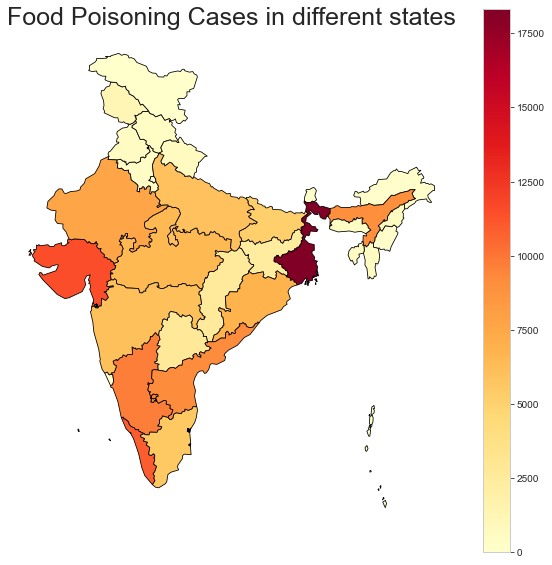

In [128]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Food Poisoning Cases in different states', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='No. of Cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

#### Q2. e) Perform descriptive statistical analysis for the occurrence of the top 10 outbreaks in the assigned ”states” and plot the ”death/# of the case” ratio in geospatial plots for the assigned states for each district.


In [129]:
counts = stateData.groupby('Disease/ Illness')['No. of Cases','No. of Deaths'].sum()
counts = counts.reset_index()
topTenDiseasesInGujarat = counts.sort_values(by=['No. of Cases'], ascending=False).head(10)
print(topTenDiseasesInGujarat)

            Disease/ Illness  No. of Cases  No. of Deaths
0   Acute Diarrhoeal Disease         15336             20
21            Food Poisoning         11525              9
22                      H1N1          7362            580
10                   Cholera          3024             18
29                   Measles          2622             11
20           Food Poisioning          1920              3
39           Viral Hepatitis          1811              0
41         Viral Hepatitis E          1791              2
9                Chikungunya          1065              0
28                   Malaria           870              1


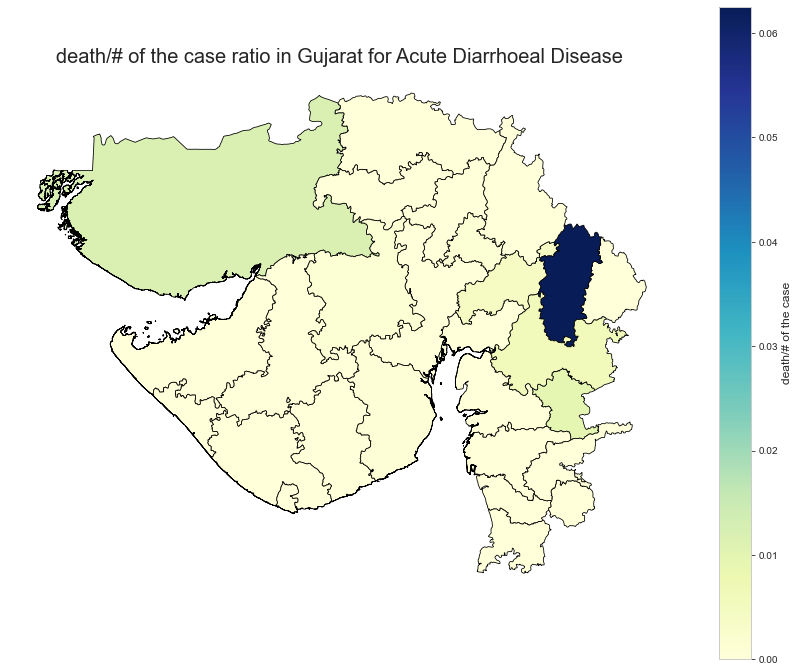

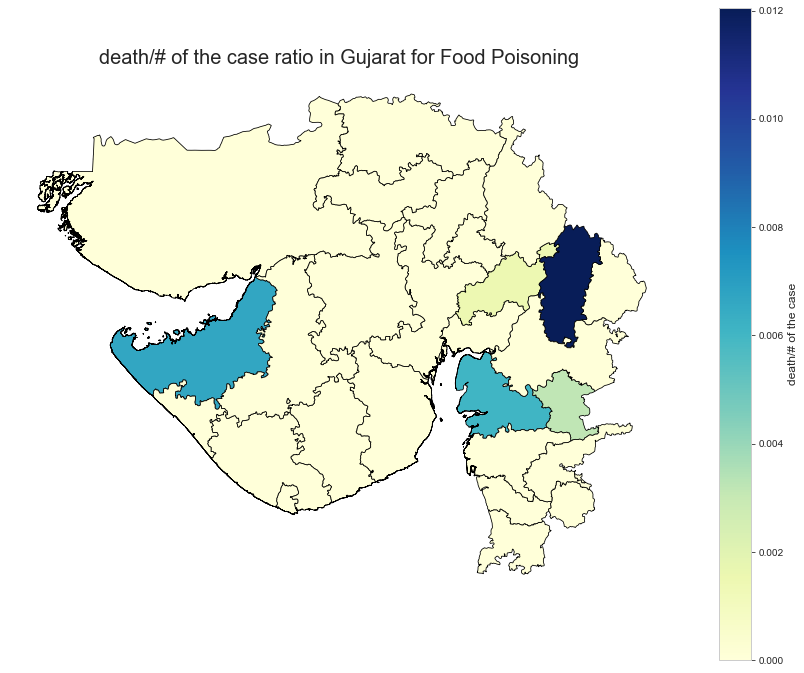

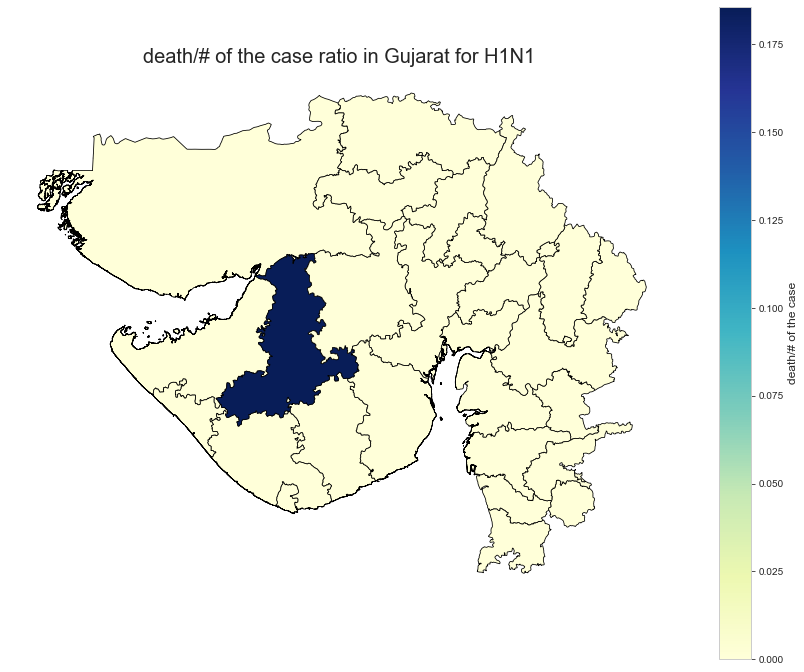

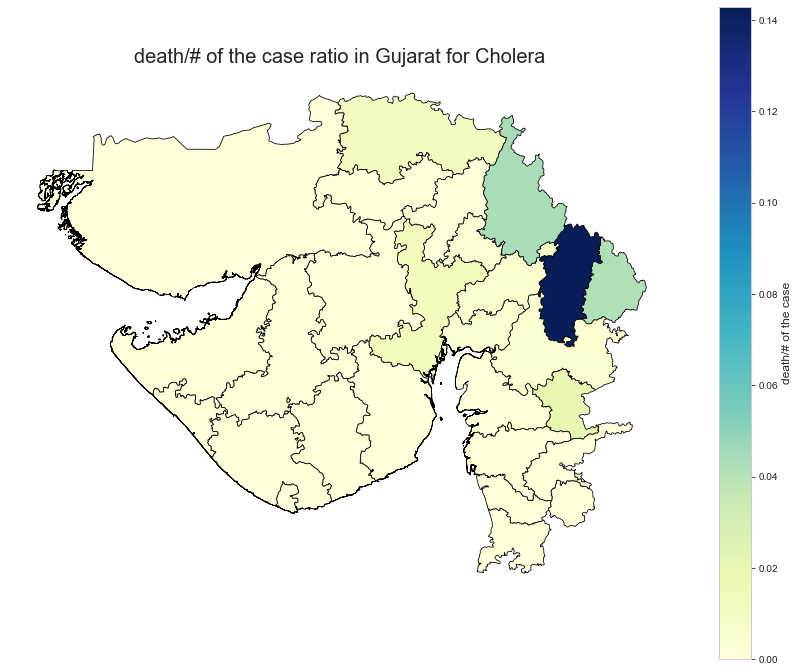

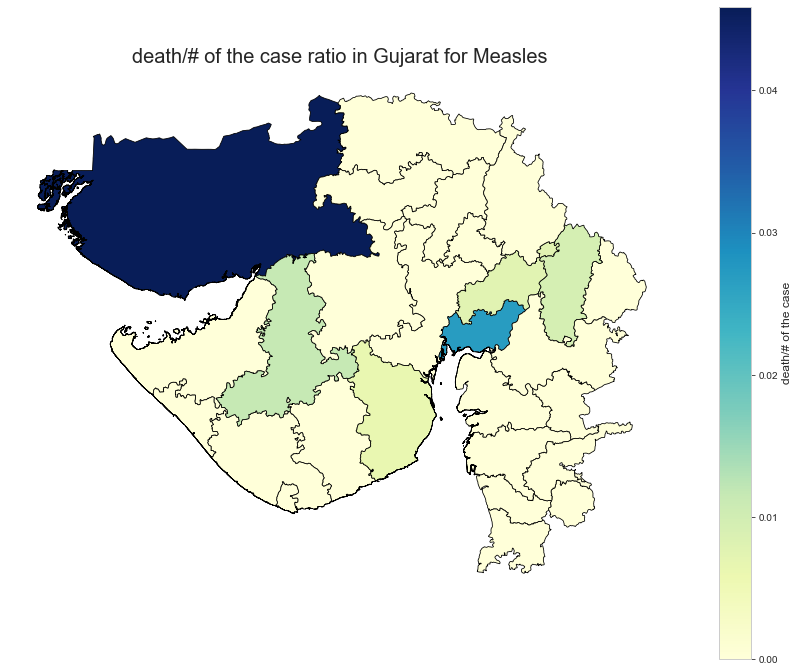

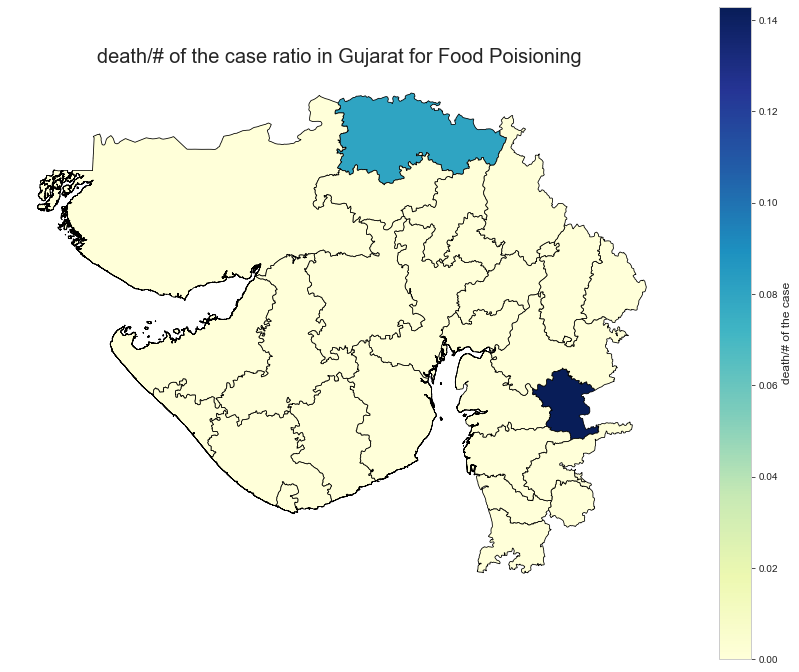

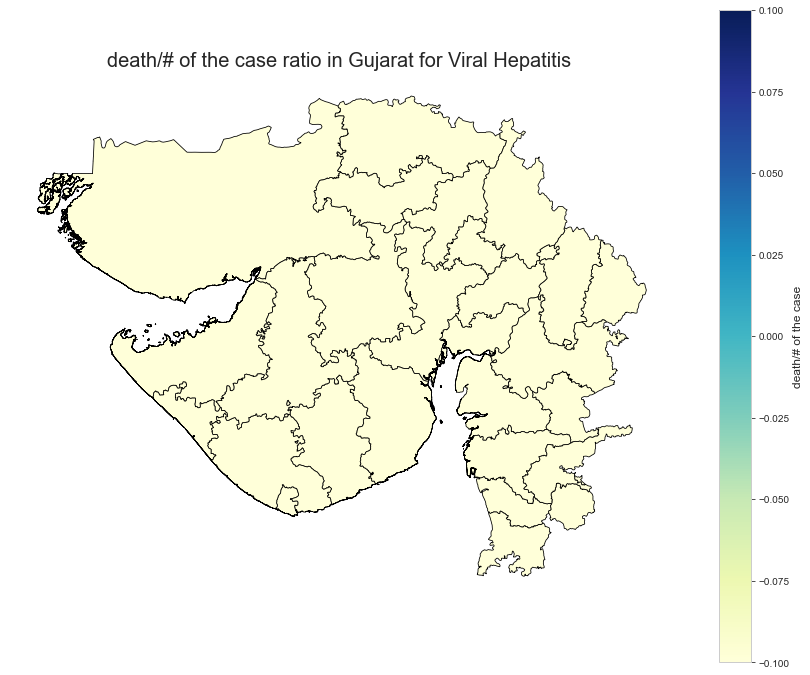

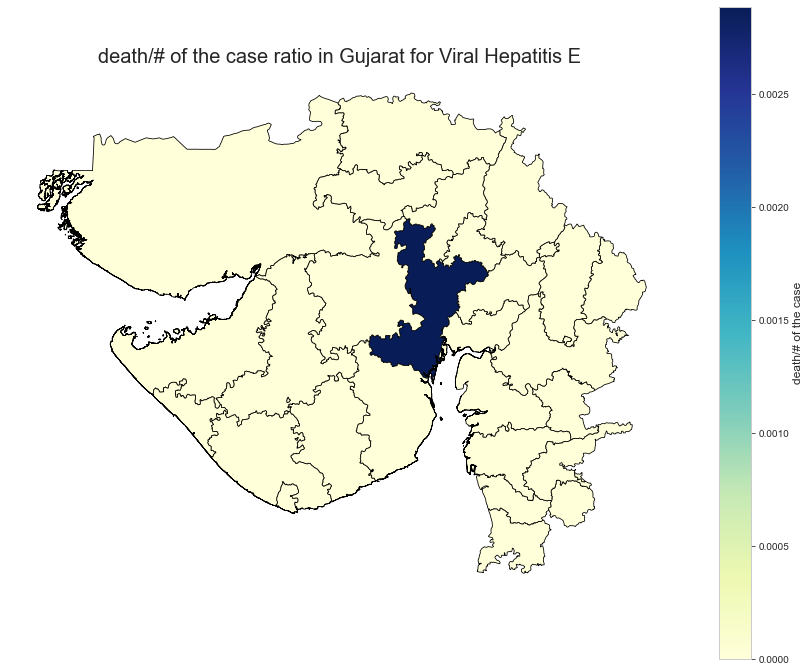

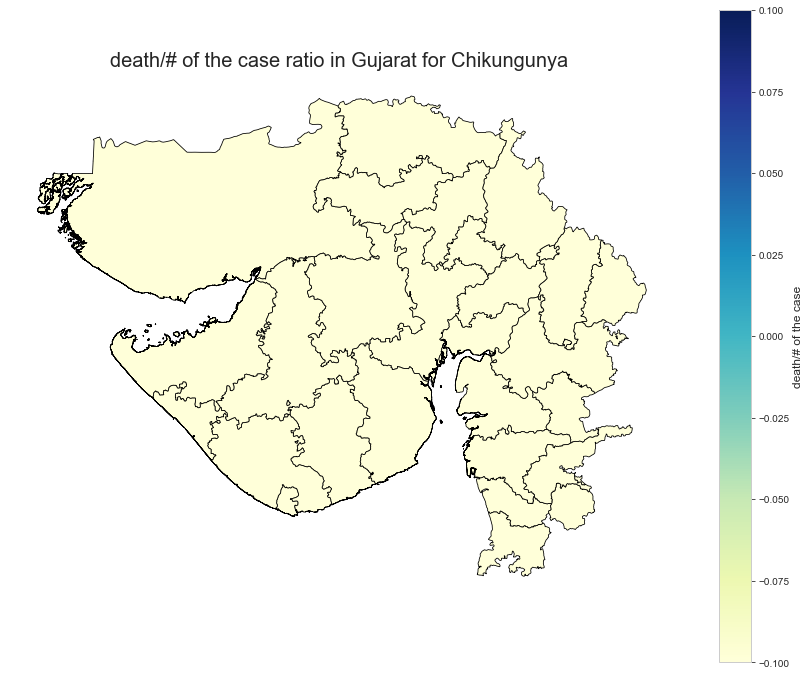

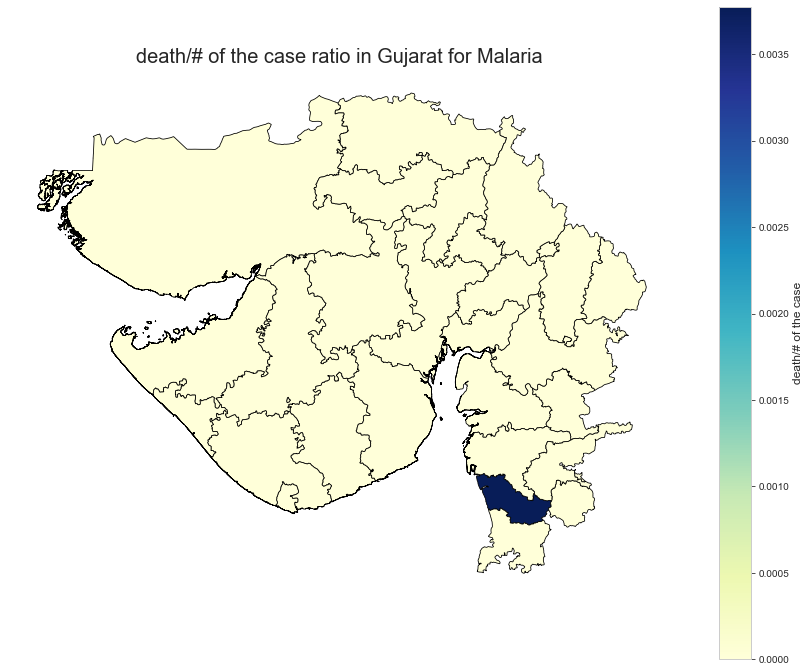

In [130]:
for disease in topTenDiseasesInGujarat['Disease/ Illness']:
    nthDisease = stateData[stateData['Disease/ Illness']==disease]
    nthDiseaseDiscrictWise = nthDisease.groupby(['Name of \n District']).sum().sort_values(by = 'No. of Cases',ascending=False)
    nthDiseaseDiscrictWise['death/# of the case'] = nthDiseaseDiscrictWise['No. of Deaths']/nthDiseaseDiscrictWise['No. of Cases']
    merged_data_ratio = map_df_state.set_index('DISTRICT').join(nthDiseaseDiscrictWise)
    merged_data_ratio['death/# of the case'] = merged_data_ratio['death/# of the case'].replace(np.nan, 0)
    merged_data_ratio['No. of Deaths'] = merged_data_ratio['No. of Deaths'].replace(np.nan, 0)
    merged_data_ratio['No. of Cases'] = merged_data_ratio['No. of Cases'].replace(np.nan, 0)
    fig, ax = plt.subplots(1, figsize=(15, 12))
    ax.axis('off')
    ax.set_title(f'death/# of the case ratio in Gujarat for {disease} ', fontdict={'fontsize': '20', 'fontweight' : '10'})
    merged_data_ratio.plot(column='death/# of the case',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "death/# of the case"})
    plt.show()

## Hence we have achieved the objectives of Q2 with various plots.